In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("emails.csv")
df.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

<Axes: xlabel='Prediction', ylabel='Count'>

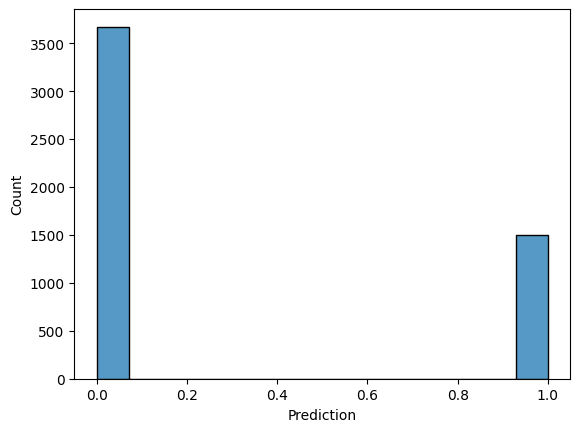

In [6]:
sns.histplot(data=df, x = df.Prediction)

Convert the text in the emails to numerical data using TF-IDF (Term Frequency-Inverse Document Frequency), a popular technique for text classification tasks.

In [13]:
# Remove the non numeric columns
X = df.drop(columns=['Email No.', 'spam'])
# Target Variable
y = df['spam']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
knn = KNeighborsClassifier(n_neighbors=7)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
print(knn.predict(X_test))

[0 0 0 ... 0 0 0]


In [18]:
print(knn.score(X_test, y_test))

0.9903381642512077


In [19]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

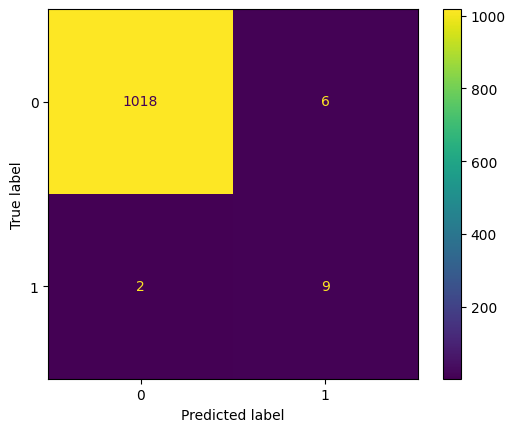

In [24]:
svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_cm_display = ConfusionMatrixDisplay(confusion_matrix = svm_cm)
svm_cm_display.plot()

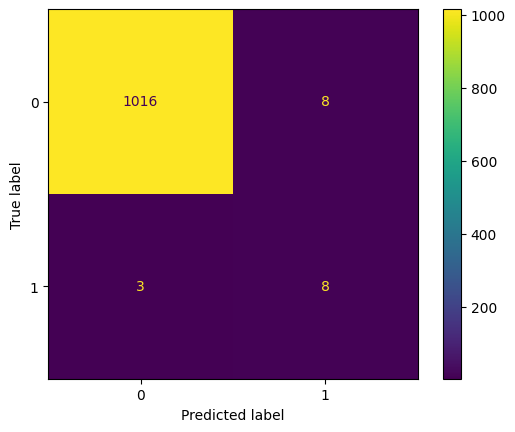

In [27]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
knn_cm_display = ConfusionMatrixDisplay(confusion_matrix = knn_cm)
knn_cm_display.plot()

In [28]:
# Define a function to display performance metrics
def display_metrics(y_test, y_pred, model_name):
    print(f"{model_name} Performance Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# KNN Metrics
display_metrics(y_test, y_pred_knn, "K-Nearest Neighbors")

# SVM Metrics
display_metrics(y_test, y_pred_svm, "Support Vector Machine")

K-Nearest Neighbors Performance Metrics:
Accuracy: 0.9893719806763285
Precision: 0.5
Recall: 0.7272727272727273
F1 Score: 0.5925925925925926

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1024
           1       0.50      0.73      0.59        11

    accuracy                           0.99      1035
   macro avg       0.75      0.86      0.79      1035
weighted avg       0.99      0.99      0.99      1035

Support Vector Machine Performance Metrics:
Accuracy: 0.9922705314009662
Precision: 0.6
Recall: 0.8181818181818182
F1 Score: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1024
           1       0.60      0.82      0.69        11

    accuracy                           0.99      1035
   macro avg       0.80      0.91      0.84      1035
weighted avg       0.99      0.99      0.99      1035

